In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/tmas/config"

plate-design.json	    UKMYC5-drug-matrix.txt	UKMYC6-drug-matrix.txt
UKMYC5-conc-matrix.txt	    UKMYC6-conc-matrix.txt
UKMYC5-dilution-matrix.txt  UKMYC6-dilution-matrix.txt


In [5]:
import re
import os
import pandas as pd
from pathlib import Path
import json
import numpy as np

In [6]:
data_dir = Path("/content/drive/My Drive/tmas")
plate_images_folder =  data_dir / "CRYPTIC" / "plate-images-20240423"
plates_csv_file = data_dir / "CRYPTIC" / "PLATES-20240423.csv"
ukmyc_csv_file = data_dir / "CRYPTIC" / "UKMYC_PHENOTYPES-20240423.csv"
plate_design_file = data_dir / "config" / "plate-design.json"

In [7]:
def extract_image_name(file_name):
    # Use a regular expression to capture the part of the file name before '-UKMYC[5-6]-filtered.png'
    match = re.search(r"^(.+)-UKMYC[56]-filtered\.png$", file_name)
    if match:
        return match.group(1)
    return None

def read_filenames_and_extract(folder_path):
    # Dictionary to hold image names classified by subfolder
    image_names = {}

    # Loop through the main folders (e.g., "UKMYC5", "UKMYC6")
    for main_folder in os.listdir(folder_path):
        main_folder_path = os.path.join(folder_path, main_folder)
        if os.path.isdir(main_folder_path):  # check if it is a directory
            image_names[main_folder] = {}

            # Loop through each subfolder (e.g., "14", "21")
            for subfolder in os.listdir(main_folder_path):
                subfolder_path = os.path.join(main_folder_path, subfolder)
                if os.path.isdir(subfolder_path):
                    image_names[main_folder][subfolder] = []

                    # List all files in the subfolder
                    for filename in os.listdir(subfolder_path):
                        if filename.endswith('-filtered.png'):  # check if the file is an image
                            extracted_name = extract_image_name(filename)
                            if extracted_name:
                                image_names[main_folder][subfolder].append(extracted_name)

    return image_names

In [8]:
image_file_names = read_filenames_and_extract(plate_images_folder)
# print(image_file_names)

In [9]:
print(len(image_file_names['UKMYC5']['14']))
print(len(image_file_names['UKMYC5']['21']))
print(len(image_file_names['UKMYC6']['14']))
print(len(image_file_names['UKMYC6']['21']))

5731
135
8888
384


In [10]:
image_names = []

image_names.extend(image_file_names['UKMYC5']['14'])
image_names.extend(image_file_names['UKMYC5']['21'])
image_names.extend(image_file_names['UKMYC6']['14'])
image_names.extend(image_file_names['UKMYC6']['21'])

print(f"Total number of images: {len(image_names)}")

Total number of images: 15138


In [11]:
def load_plate_csv_data(csv_path):
    # Load only the necessary columns for efficiency
    data = pd.read_csv(csv_path, usecols=['UNIQUEID', 'IMAGEFILENAME'])

    # Create a dictionary to map image filenames to unique IDs
    image_to_unique_id = dict(zip(data['IMAGEFILENAME'], data['UNIQUEID']))

    return image_to_unique_id

def find_unique_ids(image_file_names, image_to_unique_id):
    # Dictionary to store unique IDs matched to image file names
    unique_ids = {}

    # Loop through each image file name to find corresponding unique IDs
    for image_file_name in image_file_names:
        if image_file_name in image_to_unique_id:
            unique_ids[image_file_name] = image_to_unique_id[image_file_name]
        else:
            unique_ids[image_file_name] = None  # no match found

    return unique_ids

In [12]:
image_to_unique_id = load_plate_csv_data(plates_csv_file) # load data from "PLATES-20240423.csv"
unique_ids = find_unique_ids(image_names, image_to_unique_id)

print(len(unique_ids))
print(unique_ids)

15138
{'08-05TB42023-1830-1-14': 'site.08.subj.05TB42023.lab.1830.iso.1', '08-05TB43017-1894-1-14': 'site.08.subj.05TB43017.lab.1894.iso.1', '08-24TB-004-2088-1-14': 'site.08.subj.24TB-004.lab.2088.iso.1', '08-24TB-074-2208-1-14': 'site.08.subj.24TB-074.lab.2208.iso.1', '08-05TB43024-1950-1-14': 'site.08.subj.05TB43024.lab.1950.iso.1', '08-05TB42053-1937-1-14': 'site.08.subj.05TB42053.lab.1937.iso.1', '08-24TB-081-2249-1-14': 'site.08.subj.24TB-081.lab.2249.iso.1', '08-05TB42007-1771-1-14': 'site.08.subj.05TB42007.lab.1771.iso.1', '08-05TB41041-1941-1-14': 'site.08.subj.05TB41041.lab.1941.iso.1', '08-05TB43007-1818-1-14': 'site.08.subj.05TB43007.lab.1818.iso.1', '08-24TB00-018-2313-1-14': 'site.08.subj.24TB00-018.lab.2313.iso.1', '08-24TB00-005-2246-1-14': 'site.08.subj.24TB00-005.lab.2246.iso.1', '08-05TB42038-1871-1-14': 'site.08.subj.05TB42038.lab.1871.iso.1', '08-24TB00-043-2438-1-14': 'site.08.subj.24TB00-043.lab.2438.iso.1', '08-24TB00-063-2401-1-14': 'site.08.subj.24TB00-063.lab

In [13]:
ukmyc_dataset = pd.read_csv(ukmyc_csv_file, usecols=['UNIQUEID', 'DRUG', 'PLATEDESIGN', 'MIC'])
print(ukmyc_dataset.head())

                                       UNIQUEID DRUG PLATEDESIGN      MIC
0      site.05.subj.PMFR-0743.lab.MFR-247.iso.1  DLM      UKMYC5  <=0.015
1  site.10.subj.YA00033005.lab.YA00033005.iso.1  CFZ      UKMYC5     0.25
2    site.06.subj.06TB_1032.lab.06MIL2037.iso.1  MXF      UKMYC6     0.25
3        site.02.subj.1892.lab.2015184043.iso.1  INH      UKMYC6  <=0.025
4    site.06.subj.06TB_0404.lab.06MIL1373.iso.1  MXF      UKMYC6     0.25


In [14]:
# Sort the DataFrame based on the 'UNIQUEID' column
ukmyc_dataset_sorted = ukmyc_dataset.sort_values(by='UNIQUEID')
print(ukmyc_dataset_sorted.head(13))

                                    UNIQUEID DRUG PLATEDESIGN    MIC
187074  site.01.subj.DR0013.lab.DR0013.iso.1  CFZ      UKMYC6   0.06
115804  site.01.subj.DR0013.lab.DR0013.iso.1  BDQ      UKMYC6   0.06
160827  site.01.subj.DR0013.lab.DR0013.iso.1  EMB      UKMYC6    4.0
156376  site.01.subj.DR0013.lab.DR0013.iso.1  LEV      UKMYC6    0.5
29369   site.01.subj.DR0013.lab.DR0013.iso.1  KAN      UKMYC6    4.0
25885   site.01.subj.DR0013.lab.DR0013.iso.1  DLM      UKMYC6  0.015
108568  site.01.subj.DR0013.lab.DR0013.iso.1  LZD      UKMYC6    1.0
72112   site.01.subj.DR0013.lab.DR0013.iso.1  MXF      UKMYC6   0.25
17841   site.01.subj.DR0013.lab.DR0013.iso.1  AMI      UKMYC6    0.5
159600  site.01.subj.DR0013.lab.DR0013.iso.1  RIF      UKMYC6    8.0
149449  site.01.subj.DR0013.lab.DR0013.iso.1  ETH      UKMYC6    1.0
47865   site.01.subj.DR0013.lab.DR0013.iso.1  RFB      UKMYC6    2.0
10516   site.01.subj.DR0013.lab.DR0013.iso.1  INH      UKMYC6    1.6


In [15]:
def find_image_name_by_unique_id(unique_id, unique_ids_dict):
    for image_name, id in unique_ids_dict.items():
        if id == unique_id:
            return image_name
    return None

def find_unique_id_by_image_name(image_name, unique_ids_dict):
    return unique_ids_dict.get(image_name, None)

In [16]:
search_unique_id = "site.01.subj.DR0013.lab.DR0013.iso.1"
print(find_image_name_by_unique_id(search_unique_id, unique_ids))

01-DR0013-DR0013-1-14


In [17]:
search_image_name = "01-DR0013-DR0013-1-14"
print(find_unique_id_by_image_name(search_image_name, unique_ids))

site.01.subj.DR0013.lab.DR0013.iso.1


In [18]:
with open(plate_design_file, 'r') as file:
    plate_design = json.load(file)

print(plate_design)

{'UKMYC5': {'drug_matrix': [['BDQ', 'KAN', 'KAN', 'KAN', 'KAN', 'KAN', 'ETH', 'ETH', 'ETH', 'ETH', 'ETH', 'ETH'], ['BDQ', 'AMI', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'RFB', 'PAS'], ['BDQ', 'AMI', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'RFB', 'PAS'], ['BDQ', 'AMI', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'RFB', 'PAS'], ['BDQ', 'AMI', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'RFB', 'PAS'], ['BDQ', 'AMI', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'RFB', 'PAS'], ['BDQ', 'AMI', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'RFB', 'PAS'], ['BDQ', 'EMB', 'EMB', 'INH', 'LEV', 'MXF', 'DLM', 'LZD', 'CFZ', 'RIF', 'POS', 'POS']], 'dilution_matrix': [[8, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 1], [7, 6, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6], [6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5], [5, 4, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4], [4, 3, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3], [3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2], [2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1

In [20]:
def apply_mic_rules(mic):
    # Check if mic is a string and starts with special characters
    if isinstance(mic, str):
        if mic.startswith('<='):
            return '-none-', float(mic[2:])
        elif mic.startswith('>'):
            return 'growth', float(mic[1:])
    # Handle cases where mic is already a float or can be converted to float
    try:
        return 'numerical', float(mic)
    except ValueError:
        raise ValueError(f"MIC value {mic} is not properly formatted or is not a numeric value.")


def mark_wells(plate_design, drug_data):
    marked_plates = {}  # Dictionary to store all marked plates by unique ID

    # Process each unique ID
    for unique_id in drug_data['UNIQUEID'].unique():
        specific_data = drug_data[drug_data['UNIQUEID'] == unique_id]
        target_design = specific_data['PLATEDESIGN'].iloc[0]

        if target_design not in plate_design:
            print(f"No data available for plate design {target_design}")
            continue

        # Initialize the marked plate
        marked_plate = [['untested' for _ in range(12)] for _ in range(8)]
        details = plate_design[target_design]
        drug_matrix = details['drug_matrix']
        dilution_matrix = details['dilution_matrix']
        conc_matrix = details['conc_matrix']

        for i in range(len(drug_matrix)):
            for j in range(len(drug_matrix[i])):
                drug = drug_matrix[i][j]
                mic_entry = specific_data[(specific_data['DRUG'] == drug) & (specific_data['PLATEDESIGN'] == target_design)]

                if not mic_entry.empty:
                    mic_type, mic_value = apply_mic_rules(mic_entry['MIC'].values[0])

                    if mic_type == 'growth':
                        status = 'growth'
                    elif mic_type == '-none-':
                        status = '-none-'
                    else:  # Numerical MIC
                        conc = conc_matrix[i][j]
                        status = 'growth' if conc <= mic_value else '-none-'
                else:
                    if drug == "POS":
                        status = 'growth'
                    else:
                        status = 'untested'

                marked_plate[i][j] = status

        marked_plates[unique_id] = marked_plate  # Store the marked plate with its unique ID

    return marked_plates

# Plates to be marked - dictionary
marked_plates = mark_wells(plate_design, ukmyc_dataset_sorted)

# Print out the marked plates for each unique ID
if marked_plates:
    for unique_id, plate in marked_plates.items():
        print(f"Plate Unique ID: {unique_id}")
        for row in plate:
            print(' '.join(row))
        print("\n")


Streaming output truncated to the last 5000 lines.
-none- -none- growth growth -none- -none- -none- growth -none- growth growth growth
-none- -none- growth growth -none- -none- -none- growth growth growth growth growth
-none- -none- growth growth -none- -none- growth growth growth growth growth growth
-none- -none- growth growth growth growth growth growth growth growth growth growth
growth -none- growth growth growth growth growth growth growth growth growth growth
growth growth growth growth growth growth growth growth growth growth growth growth


Plate Unique ID: site.04.subj.01426.lab.733579.iso.1
-none- -none- -none- -none- growth growth -none- -none- -none- -none- growth growth
-none- -none- -none- -none- -none- -none- -none- -none- -none- -none- -none- -none-
-none- -none- -none- -none- -none- -none- -none- growth -none- -none- -none- -none-
-none- -none- -none- -none- -none- -none- -none- growth -none- -none- -none- -none-
-none- -none- growth -none- growth -none- -none- growt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Plate Unique ID: site.10.subj.XD01518427.lab.XD01518427.iso.1
-none- growth growth growth growth growth growth growth growth growth growth growth
-none- growth growth growth growth growth -none- -none- -none- growth growth -none-
-none- growth growth growth growth growth -none- -none- -none- growth growth -none-
-none- growth growth growth growth growth -none- growth -none- growth growth growth
-none- growth growth growth growth growth -none- growth -none- growth growth growth
-none- growth growth growth growth growth -none- growth -none- growth growth growth
-none- growth growth growth growth growth -none- growth growth growth growth growth
-none- growth growth growth growth growth -none- growth growth growth growth growth


Plate Unique ID: site.10.subj.XD01555754.lab.XD01555754.iso.1
-none- -none- -none- -none- growth growth -none- -none- -none- -none- growth growth
-none- -none- -none- -none- -none- -none- -none- -none- -none- -non

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
print(marked_plates['site.02.subj.0004.lab.2014222010.iso.1'])

[['-none-', '-none-', '-none-', '-none-', 'growth', 'growth', '-none-', 'growth', 'growth', 'growth', 'growth', 'growth'], ['-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-'], ['-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-', '-none-'], ['-none-', '-none-', 'growth', '-none-', '-none-', '-none-', '-none-', 'growth', '-none-', '-none-', '-none-', '-none-'], ['-none-', '-none-', 'growth', '-none-', 'growth', '-none-', '-none-', 'growth', '-none-', '-none-', '-none-', '-none-'], ['growth', '-none-', 'growth', '-none-', 'growth', 'growth', '-none-', 'growth', '-none-', '-none-', '-none-', '-none-'], ['growth', '-none-', 'growth', 'growth', 'growth', 'growth', '-none-', 'growth', 'growth', 'growth', '-none-', '-none-'], ['growth', 'growth', 'growth', 'growth', 'growth', 'growth', '-none-', 'growth', 'growth', 'growth', 'growth', 'growth']]


In [23]:
# Get image name based on id faster
reversed_unique_ids = {v: k for k, v in unique_ids.items()}

In [24]:
import cv2
from pathlib import Path

def get_plate_design(unique_id, ukmyc_dataset_sorted):
    """ Retrieve the plate design for a given unique ID from the sorted DataFrame. """
    filtered = ukmyc_dataset_sorted[ukmyc_dataset_sorted['UNIQUEID'] == unique_id]
    return filtered.iloc[0]['PLATEDESIGN'] if not filtered.empty else None

def load_image(image_path):
    """ Load an image from the given path. """
    image = cv2.imread(str(image_path))
    if image is None:
        raise FileNotFoundError(f"Failed to load image: {image_path}")
    return image

def draw_growth_circles(image, marked_plate, well_center, well_radius):
    """ Draw circles on growth positions with adjusted radius. """
    num_rows, num_cols = len(marked_plate), len(marked_plate[0])
    for i in range(num_rows):
        for j in range(num_cols):
            if marked_plate[i][j] == 'growth':
                center = (int(well_center[i, j][0]), int(well_center[i, j][1]))
                adjusted_radius = int(well_radius[i, j] * 0.9)  # Reducing radius by 10%
                cv2.circle(image, center, adjusted_radius, (0, 255, 0), 2)


def identify_wells(image,hough_param1=20,hough_param2=25,radius_tolerance=0.005,verbose=False):
        well_dimensions = (8, 12)


        well_index = np.zeros(well_dimensions, dtype=int)
        well_radii = np.zeros(well_dimensions, dtype=float)
        well_center = np.zeros((well_dimensions[0], well_dimensions[1], 2), dtype=int)
        well_top_left = np.zeros((well_dimensions[0], well_dimensions[1], 2), dtype=int)
        well_bottom_right = np.zeros((well_dimensions[0], well_dimensions[1], 2), dtype=int)


        # Number of wells
        number_of_wells = well_dimensions[0] * well_dimensions[1]

        # # Read in the image in grayscale
        # image = cv2.imread(image_path)
        # if image is None:
        #     raise ValueError("Image could not be loaded, check the path.")

        # Image dimensions
        image_dimensions = image.shape  # Assumes image is already in grayscale

        # estimate the dimensions of the well
        estimate_well_y = float(image_dimensions[0])/well_dimensions[0]
        estimate_well_x = float(image_dimensions[1])/well_dimensions[1]

        # verify that the estimated dimensions of the wells are within 5% of one another
        if estimate_well_x > estimate_well_y:
            if estimate_well_x > 1.05*estimate_well_y:
                return False
        else:
            if estimate_well_y > 1.05*estimate_well_x:
                return False

        # now estimate the radius as the mean of half the estimated well dimension
        estimated_radius=(estimate_well_x + estimate_well_y)/4.

        radius_multiplier=1.+radius_tolerance

        # read in a greyscale image for identifying
        grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # iterate until the correct number of circles have been found
        while True:

            circles=None

            while circles is None:

                # detect circles using the Hough transform
                circles=cv2.HoughCircles(grey_image,cv2.HOUGH_GRADIENT,1,50,param1=hough_param1,param2=hough_param2,minRadius=int(estimated_radius/radius_multiplier),maxRadius=int(estimated_radius*radius_multiplier))

                # increase the range of radii that will be searched for
                radius_multiplier+=radius_tolerance

                # if verbose:
                    # print("No circles, "+str(int(estimated_radius/radius_multiplier))+" < radius < "+str(int(estimated_radius*radius_multiplier)))

            # count how many circles there are
            number_of_circles=len(circles[0])

            # if verbose:
            #     print(str(number_of_circles)+" circles, "+str(int(estimated_radius/radius_multiplier))+" < radius < "+str(int(estimated_radius*radius_multiplier)))

            # check to see if there are enough circles
            if number_of_circles>=number_of_wells:
                break
            elif number_of_circles>number_of_wells:
                # print(self.image_path+": "+str(number_of_circles)+" circles found, this is more than the expected number of "+str(self.number_of_wells))
                break
            elif radius_multiplier>2:
                # print(self.image_path+": "+"reached maximum radius multiplier of 2 and found "+str(number_of_circles)+" circles, giving up")
                break
            else:
                radius_multiplier+=radius_tolerance

        well_counter=0

        one_circle_per_well=True

        # move along the wells in the x-direction (columns)
        for ix in range(0,well_dimensions[1]):

            # move along the wells in the y-direction (rows)
            for iy in range(0,well_dimensions[0]):

                # calculate the bottom left and top right coordinates of the well
                top_left=(int(ix*estimate_well_x), int(iy*estimate_well_y))
                bottom_right=(int((ix+1)*estimate_well_x), int((iy+1)*estimate_well_y))

                number_of_circles_in_well=0

                # loop over the list of identified wells
                for ic in circles[0,]:

                    # check to see if the circle lies with the well
                    if top_left[0] < ic[0] < bottom_right[0]:
                        if top_left[1] < ic[1] < bottom_right[1]:
                            number_of_circles_in_well+=1
                            circle=ic

                if number_of_circles_in_well==1:

                    well_centre=(circle[0],circle[1])
                    well_radius=circle[2]
                    well_extent=1.2*well_radius

                    x1=max(0,int(well_centre[0]-well_extent))
                    x2=min(image_dimensions[1],int(well_centre[0]+well_extent))

                    y1=max(0,int(well_centre[1]-well_extent))
                    y2=min(image_dimensions[0],int(well_centre[1]+well_extent))

                    well_index[iy,ix]= well_counter
                    well_center[iy,ix] = well_centre
                    well_radii[iy,ix] = well_radius
                    well_top_left[iy,ix] = (max(0,int(well_centre[0]-well_extent)),max(0,int(well_centre[1]-well_extent)))
                    well_bottom_right[iy,ix] = (min(image_dimensions[1],int(well_centre[0]+well_extent)),min(image_dimensions[0],int(well_centre[1]+well_extent)))
                    well_counter+=1
                else:
                    if verbose:
                        print(number_of_circles_in_well)
                    one_circle_per_well=False



        if well_counter==number_of_wells and one_circle_per_well:
            return well_center, well_radii
        else:
            return False

def extract_circles(reversed_unique_ids, unique_ids, base_dir, ukmyc_dataset_sorted, file_extension='png'):
    base_dir = Path(base_dir)
    output_dir = base_dir / 'config'
    output_dir.mkdir(exist_ok=True)

    circles = {}

    for detailed_id in unique_ids:
        simplified_id = reversed_unique_ids.get(detailed_id)
        if not simplified_id:
            # print(f"No image identifier found for unique ID: {detailed_id}")
            continue

        plate_design = get_plate_design(detailed_id, ukmyc_dataset_sorted)
        if not plate_design:
            print(f"No plate design data available for unique ID: {detailed_id}")
            continue

        subfolder = '14' if '14' in simplified_id else '21'
        image_dir = base_dir / "CRYPTIC" / "plate-images-20240423" / plate_design / subfolder
        image_path = image_dir / f"{simplified_id}-{plate_design}-filtered.{file_extension}"

        try:
            image = load_image(image_path)
            result = identify_wells(image, verbose=True)
            if not result:
                print(f"Failed to identify wells properly in image: {image_path}")
                continue

            well_center, well_radii = result

            circles[detailed_id] = {
                'image_name': image_path.name,
                'well_centers': well_center.tolist(),
                'well_radii': well_radii.tolist()
            }

            print(f"Name: {image_path.name}")
        except FileNotFoundError as e:
            print(e)
        except Exception as e:
            print(f"An error occurred while processing image: {image_path}")
            print(str(e))

    # Return all 96 circles info
    return circles

In [25]:
base_directory = "/content/drive/MyDrive/tmas"
# Get all unique IDs from the keys of the reversed_unique_ids dictionary
unique_ids_to_process = list(reversed_unique_ids.keys())

In [ ]:
# Get all 96 circles
circles = extract_circles(reversed_unique_ids, unique_ids_to_process, base_directory, ukmyc_dataset_sorted)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Name: 05-LR-2313-FN-00787-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2314-FN-00820-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2316-FN-00893-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2208-FN-00052-17-1-14-UKMYC6-filtered.png
Name: 05-LR-2241-FN-00702-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2193-FN-01842-16-1-14-UKMYC6-filtered.png
Name: 05-LR-2080-FN-01184-15-1-14-UKMYC6-filtered.png
Name: 05-LR-2427-FN-01617-15-1-14-UKMYC6-filtered.png
Name: 05-LR-2295-FN-00322-16-1-14-UKMYC6-filtered.png
Name: 05-LR-2323-FN-01116-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2468-FN-02113-15-1-14-UKMYC6-filtered.png
Name: 05-LR-2399-FN-01726-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2351-FN-00422-16-1-14-UKMYC6-filtered.png
Name: 05-LR-2210-FN-00062-17-1-14-UKMYC6-filtered.png
Name: 05-LR-2400-FN-01727-18-1-14-UKMYC6-filtered.png
Name: 05-LR-2233-FN-01139-17-1-14-UKMYC6-filtered.png
Name: 05-LR-2436-FN-01253-16-1-14-UKMYC6-filtered.png
Name: 05-LR-2305-FN-00527

In [26]:
print(len(circles))

NameError: name 'circles' is not defined

In [ ]:
print(circles)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import json
from pathlib import Path

# Ensure the directory exists
output_dir = Path('/content/drive/MyDrive/tmas/config')
output_dir.mkdir(parents=True, exist_ok=True)

# Define the file path
output_file_path = output_dir / 'plate-xy.json'

# Write the annotations dictionary to the JSON file
with open(output_file_path, 'w') as json_file:
    json.dump(circles, json_file, indent=4)

print(f"Circles saved to {output_file_path}")

Annotations saved to /content/drive/MyDrive/tmas/config/plat-xy.json


In [ ]:
import json
from pathlib import Path

# Define the file path
file_path = Path('/content/drive/MyDrive/tmas/config/plate-xy.json')

# Load the JSON file and print its contents
try:
    with open(file_path, 'r') as json_file:
        check = json.load(json_file)
        print("First 3 items in the annotations:")
        for i, (key, value) in enumerate(circles.items()):
            if i < 3:
                print(f"{key}: {json.dumps(value, indent=2)}")
            else:
                break
except FileNotFoundError:
    print(f"File not found: {file_path}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


First 5 items in the annotations:
site.08.subj.05TB42023.lab.1830.iso.1: {
    "image_name": "08-05TB42023-1830-1-14-UKMYC5-filtered.png",
    "well_centers": [
        [
            [
                66,
                60
            ],
            [
                147,
                60
            ],
            [
                225,
                60
            ],
            [
                306,
                58
            ],
            [
                393,
                56
            ],
            [
                472,
                55
            ],
            [
                553,
                62
            ],
            [
                635,
                57
            ],
            [
                718,
                55
            ],
            [
                801,
                59
            ],
            [
                881,
                58
            ],
            [
                961,
                56
            ]
   

## Extract growth circles


In [95]:
def extract_growths(reversed_unique_ids, unique_ids, marked_plates, base_dir, ukmyc_dataset_sorted, file_extension='png'):
    base_dir = Path(base_dir)
    output_dir = base_dir / 'config'
    output_dir.mkdir(exist_ok=True)

    growths = {}

    for detailed_id in unique_ids:
        print(f"Processing unique ID: {detailed_id}")

        simplified_id = reversed_unique_ids.get(detailed_id)
        if not simplified_id:
            print(f"No image identifier found for unique ID: {detailed_id}")
            continue

        plate_design = get_plate_design(detailed_id, ukmyc_dataset_sorted)
        if not plate_design:
            print(f"No plate design data available for unique ID: {detailed_id}")
            continue

        subfolder = '14' if '14' in simplified_id else '21'
        image_dir = base_dir / "CRYPTIC" / "plate-images-20240423" / plate_design / subfolder
        image_path = image_dir / f"{simplified_id}-{plate_design}-filtered.{file_extension}"

        print(f"Image path: {image_path}")

        try:
            image = load_image(image_path)
            result = identify_wells(image, verbose=True)
            if not result:
                print(f"Failed to identify wells properly in image: {image_path}")
                continue

            well_center, well_radii = result

            # Initialize the growth dictionary for the current detailed_id
            growths[detailed_id] = {
                'image_name': image_path.name,
                'growth_circles': []
            }

            # Process wells marked as "growth"
            for row_index, row in enumerate(marked_plates.get(detailed_id, [])):
                for col_index, mark in enumerate(row):
                    if mark == "growth":
                        center = well_center[row_index][col_index]
                        radius = well_radii[row_index][col_index]
                        growths[detailed_id]['growth_circles'].append({
                            'row_index': row_index,
                            'col_index': col_index,
                            'center': center.tolist(),
                            'radius': radius*0.72
                        })

            if growths[detailed_id]['growth_circles']:
                print(f"Processed image: {image_path.name}")
            else:
                print(f"No growth found for unique ID: {detailed_id}")
                del growths[detailed_id]  # Remove entry if no growth found
        except FileNotFoundError as e:
            print(f"File not found: {e}")
        except Exception as e:
            print(f"An error occurred while processing image: {image_path}")
            print(str(e))

    # Return all 96 circles info
    return growths

In [96]:
growths_annotations = extract_growths(reversed_unique_ids, unique_ids_to_process, marked_plates, base_directory, ukmyc_dataset_sorted)

Streaming output truncated to the last 5000 lines.
Image path: /content/drive/MyDrive/tmas/CRYPTIC/plate-images-20240423/UKMYC6/14/03-10585-IML-00986-1-14-UKMYC6-filtered.png
Processed image: 03-10585-IML-00986-1-14-UKMYC6-filtered.png
Processing unique ID: site.03.subj.10532.lab.IML-00782.iso.1
Image path: /content/drive/MyDrive/tmas/CRYPTIC/plate-images-20240423/UKMYC6/14/03-10532-IML-00782-1-14-UKMYC6-filtered.png
Processed image: 03-10532-IML-00782-1-14-UKMYC6-filtered.png
Processing unique ID: site.03.subj.11107.lab.IML-00794.iso.1
Image path: /content/drive/MyDrive/tmas/CRYPTIC/plate-images-20240423/UKMYC6/14/03-11107-IML-00794-1-14-UKMYC6-filtered.png
Processed image: 03-11107-IML-00794-1-14-UKMYC6-filtered.png
Processing unique ID: site.03.subj.10922.lab.IML-01009.iso.1
Image path: /content/drive/MyDrive/tmas/CRYPTIC/plate-images-20240423/UKMYC6/14/03-10922-IML-01009-1-14-UKMYC6-filtered.png
Processed image: 03-10922-IML-01009-1-14-UKMYC6-filtered.png
Processing unique ID: site

Drawing circles for image: 08-05TB42023-1830-1-14-UKMYC5-filtered.png


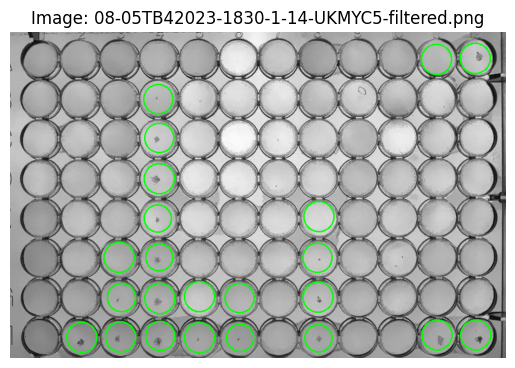

Drawing circles for image: 08-05TB43017-1894-1-14-UKMYC5-filtered.png


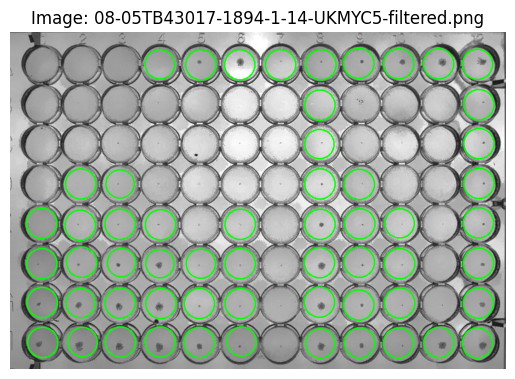

Drawing circles for image: 08-24TB-004-2088-1-14-UKMYC5-filtered.png


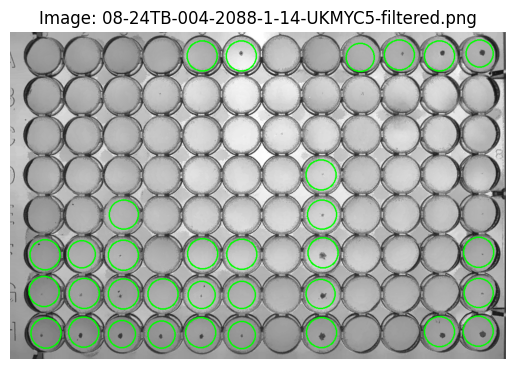

In [91]:
# Plot circle for checking the size of the annotated circles on those growth plates
def draw_circles_on_image(image_path, growth_circles):
    """
    Draws circles on the image based on growth circle information.

    :param image_path: Path to the image file.
    :param growth_circles: List of growth circles, where each is a dictionary with 'center' and 'radius'.
    :return: Image with circles drawn on it.
    """
    # Load the image
    image_path_str = str(image_path)  # Convert Path to string
    if os.path.exists(image_path_str):
        image = cv2.imread(image_path_str)
    else:
        print("Image file not found!")
        return None

    # Draw circles on the image
    for circle in growth_circles:
        center = tuple(circle['center'])
        radius = int(circle['radius'])
        color = (0, 255, 0)  # Green color for circles
        thickness = 2
        image = cv2.circle(image, center, radius, color, thickness)

    return image

def draw_all_circles(growths, base_dir):
    """
    Draws circles on all images listed in the growths dictionary.

    :param growths: Dictionary containing growth information for each detailed_id.
    :param base_dir: Base directory path where the images are stored.
    """
    for detailed_id, info in growths.items():
        image_name = info['image_name']
        growth_circles = info['growth_circles']
        image_path = Path(base_dir) / "CRYPTIC" / "plate-images-20240423" / "UKMYC5" / "14" / image_name

        print(f"Drawing circles for image: {image_name}")

        # Draw circles on the image
        image_with_circles = draw_circles_on_image(image_path, growth_circles)

        if image_with_circles is not None:
            # Convert the image from BGR to RGB (for displaying with matplotlib)
            image_rgb = cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB)

            # Display the image
            plt.imshow(image_rgb)
            plt.axis('off')  # Hide the axis
            plt.title(f"Image: {image_name}")
            plt.show()

# Example usage:
base_directory = "/content/drive/MyDrive/tmas"

# Draw all circles
# draw_all_circles(growths_annotations, base_directory)

In [97]:
print(len(growths_annotations))

15009


In [98]:
print(len(marked_plates))

15134


In [99]:
print(len(ukmyc_dataset_sorted))

202565


In [102]:
import json
from pathlib import Path
import pandas as pd

def save_to_json(data, file_path):
    """
    Saves a dictionary to a JSON file.

    :param data: Dictionary to save.
    :param file_path: Path to the output JSON file.
    """
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4)


# Convert DataFrame to dictionary
ukmyc_dataset_sorted_dict = ukmyc_dataset_sorted.to_dict(orient='records')

# Define base directory and output directory
base_directory = Path("/content/drive/MyDrive/tmas")
output_directory = base_directory / "memory"

# Create output directory if it doesn't exist
output_directory.mkdir(parents=True, exist_ok=True)

# Define file paths
growths_annotations_file = base_directory / "coordination" / "growths-xy.json"
marked_plates_file = output_directory / "marked_plates.json"
ukmyc_dataset_sorted_file = output_directory / "ukmyc_dataset_sorted.json"

# Save dictionaries as JSON files
save_to_json(growths_annotations, growths_annotations_file)
save_to_json(marked_plates, marked_plates_file)
save_to_json(ukmyc_dataset_sorted_dict, ukmyc_dataset_sorted_file)

print(f"Saved growths_annotations to {growths_annotations_file}")
print(f"Saved marked_plates to {marked_plates_file}")
print(f"Saved ukmyc_dataset_sorted to {ukmyc_dataset_sorted_file}")

Saved growths_annotations to /content/drive/MyDrive/tmas/coordination/growths-xy.json
Saved marked_plates to /content/drive/MyDrive/tmas/memory/marked_plates.json
Saved ukmyc_dataset_sorted to /content/drive/MyDrive/tmas/memory/ukmyc_dataset_sorted.json
